# Optimizer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
import scipy.stats as stats
import time
import stationarity as st

import sys
sys.path.insert(0, '..')
from multiprocess import mp_pandas_obj

In [3]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

<AxesSubplot:xlabel='time'>

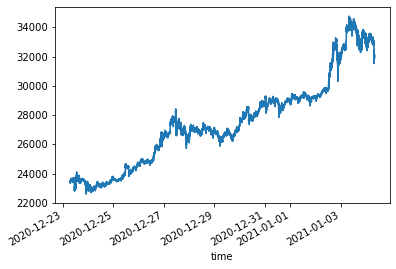

In [13]:
df[8_950_000:9_150_000].close.plot()

In [14]:
# df = df[-1_000_000:-990_000]
df = df[8_950_000:9_150_000]

In [15]:
df

,open,high,low,close,volume
time,,,,,
2020-12-23 07:04:26.775,23479.80,23479.81,23467.50,23467.51,5.150537
2020-12-23 07:04:34.251,23467.50,23480.14,23467.50,23476.70,5.030981
2020-12-23 07:04:44.745,23476.70,23476.70,23461.63,23461.63,5.020856
2020-12-23 07:04:54.027,23461.63,23467.92,23461.63,23463.73,5.003206
2020-12-23 07:04:59.219,23463.73,23487.32,23463.72,23486.40,5.102689
...,...,...,...,...,...
2021-01-04 07:47:53.579,31944.26,31999.99,31937.84,31999.99,5.007238
2021-01-04 07:47:55.434,32000.00,32000.00,31995.41,32000.00,5.004827
2021-01-04 07:47:58.805,32000.00,32000.00,31999.99,32000.00,5.355310


In [89]:
ind = df.close

In [67]:
list(range(1, 4))[::-1]

[3, 2, 1]

In [91]:
round(np.mean([3, 5, 2]), 2)

3.33

In [104]:
np.sqrt(4)

2.0

In [141]:
d_list = []
p_list = []
for s in [-607_000]: #-1_000_000, -640_000, 
    x = ind[s-40_000:s+50_000]
    d = 0.30
    p = -1
    for i in list(range(1, 6))[::-1]:
        start = time.time()
        new_ind = st.frac_diff_ffd(x.to_frame(),d,thres=1e-5) 
        p = adfuller(new_ind)[1]
        m = 1
        print(f"finished loop {i} in {round(time.time()-start, 2)} seconds")
        if p > 0.05:
            if p>0.9:
                m = 3
            elif p>0.5:
                m = 2
            d += i*m/100
#             print(f"d is now {d}")
        elif p < 0.03:
            if p<1e-6:
                m = 3
            elif p<1e-4:
                m = 2
            d -= i*m/100
#             print(f"d is now {d}")
        else:
#             print(f"p, {p}, is perfect")
            break
    d_list.append(round(d, 2))
    p_list.append(round(p, 4))
    print(f"d_list is {d_list}, p_list is {p_list}")
round(np.mean(d_list), 2)


finished loop 5 in 488.62 seconds
finished loop 4 in 381.21 seconds
finished loop 3 in 384.04 seconds
finished loop 2 in 378.15 seconds
d_list is [0.13], p_list is [0.0409]


0.13

In [16]:
start = time.time()
new_ind = st.frac_diff_ffd(df.close.to_frame(),0.15,thres=1e-5) 
print(time.time()-start)

1852.9291200637817


In [17]:
adfuller(new_ind)[1]

0.424139493518664